In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
# 가중치 시각화 - python 버전 확인
model = keras.models.load_model('cnn_model.keras')

In [3]:
conv = model.layers[0]
model.layers

[<Conv2D name=conv2d_8, built=True>,
 <MaxPooling2D name=max_pooling2d_8, built=True>,
 <Conv2D name=conv2d_9, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Flatten name=flatten_4, built=True>,
 <Dense name=dense_8, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_9, built=True>]

In [4]:
# 필터 (3,3,32), 가중치 32
print(conv.weights[0].shape,conv.weights[1].shape)


(3, 3, 1, 32) (32,)


In [5]:
# numpy로 변경
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.010368717 0.22732596


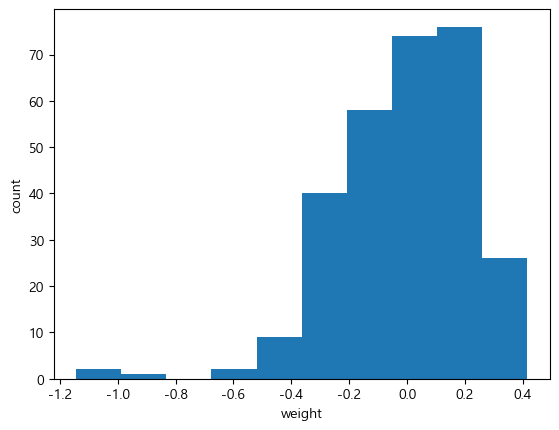

In [6]:
# 1차원 행렬로 변경
# 각각의 값을 히스토그램에 출력
# 0에 근접할 수록 의미가 없음. 이외의 값은 의미가 있음.
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

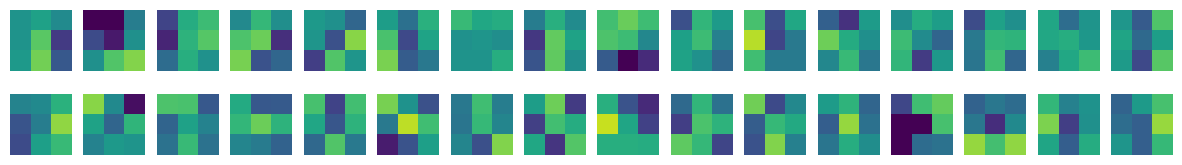

In [7]:
# 3x3x1 사이즈 32개 이미지를 출력
# 이미지 출력 2행 16열의 형태로 32개 그래프 출력
# vmin=-0.5,vmax=0.5 이미지마다 밝기가 다르기에 범위 설정


fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu', padding='same',input_shape=(28,28,1)))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0])

<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=sequential/conv2d/kernel>


In [10]:
no_training_weights = no_training_conv.weights[0].numpy()

(array([27., 38., 28., 37., 19., 22., 27., 28., 32., 30.]),
 array([-0.13911574, -0.11101891, -0.08292209, -0.05482526, -0.02672844,
         0.00136839,  0.02946521,  0.05756204,  0.08565886,  0.11375569,
         0.14185251]),
 <BarContainer object of 10 artists>)

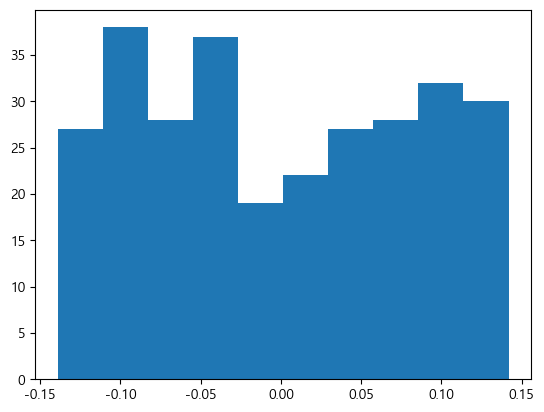

In [11]:
plt.hist(no_training_weights.reshape(-1,1))



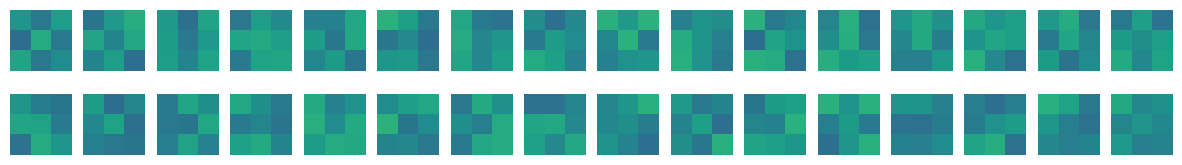

In [12]:
# 3x3x1 사이즈 32개 이미지를 출력
# 이미지 출력 2행 16열의 형태로 32개 그래프 출력
# vmin=-0.5,vmax=0.5 이미지마다 밝기가 다르기에 범위 설정


fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()